# **Input : Takes an Image and NLP question about that image**
#  **Output : Produces an answer to the NLP question**

Tool & Technologies Used : Python, PyTorch, OpenCV, NLTK, VQA, ResNet, BERT, Matplotlib, Seaborn

Unzip the uploaded zip file

In [1]:
!unzip -q /content/archive.zip -d /content/archive

# **Data Visualization**

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/archive/dataset/data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12468 entries, 0 to 12467
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  12468 non-null  object
 1   answer    12468 non-null  object
 2   image_id  12468 non-null  object
dtypes: object(3)
memory usage: 292.3+ KB


In [5]:
df.head(6)

,question,answer,image_id
0,what is on the left side of the white oven on ...,garbage_bin,image1
1,what is on the left side of the fire extinguis...,table,image1
2,what is between the the two white and black ga...,chair,image1
3,how many objects are between the fire extingui...,3,image1
4,what is the largest object in this picture,washing_machine,image1
5,how many plastic bottles are between the white...,5,image2


In [6]:
df.tail(6)

,question,answer,image_id
12462,what is in the top right,chandelier,image1448
12463,what is found below the chandelier,table,image1448
12464,what is on the floor,rug,image1449
12465,what are around dining table,chair,image1449
12466,what is at the opposite side of the dining table,decoration_item,image1449
12467,what is behind the wall divider,table,image1449


In [7]:
df.shape

(12468, 3)

In [8]:
df.columns

Index(['question', 'answer', 'image_id'], dtype='object')

In [9]:
df.index

RangeIndex(start=0, stop=12468, step=1)

In [10]:
df.dtypes

,0
question,object
answer,object
image_id,object


In [11]:
df.describe()

,question,answer,image_id
count,12468,12468,12468
unique,5886,1443,1447
top,what is on the table,2,image8
freq,248,554,31


In [12]:
df.describe(include = 'all')

,question,answer,image_id
count,12468,12468,12468
unique,5886,1443,1447
top,what is on the table,2,image8
freq,248,554,31


Checking Missing Values

In [13]:
df.isnull().sum()

,0
question,0
answer,0
image_id,0


In [14]:
df.isnull().any()

,0
question,False
answer,False
image_id,False


In [15]:
df.dropna()

,question,answer,image_id
0,what is on the left side of the white oven on ...,garbage_bin,image1
1,what is on the left side of the fire extinguis...,table,image1
2,what is between the the two white and black ga...,chair,image1
3,how many objects are between the fire extingui...,3,image1
4,what is the largest object in this picture,washing_machine,image1
...,...,...,...
12463,what is found below the chandelier,table,image1448
12464,what is on the floor,rug,image1449
12465,what are around dining table,chair,image1449
12466,what is at the opposite side of the dining table,decoration_item,image1449


In [16]:
df.fillna(0)

,question,answer,image_id
0,what is on the left side of the white oven on ...,garbage_bin,image1
1,what is on the left side of the fire extinguis...,table,image1
2,what is between the the two white and black ga...,chair,image1
3,how many objects are between the fire extingui...,3,image1
4,what is the largest object in this picture,washing_machine,image1
...,...,...,...
12463,what is found below the chandelier,table,image1448
12464,what is on the floor,rug,image1449
12465,what are around dining table,chair,image1449
12466,what is at the opposite side of the dining table,decoration_item,image1449


In [17]:
df.fillna(df.median)

,question,answer,image_id
0,what is on the left side of the white oven on ...,garbage_bin,image1
1,what is on the left side of the fire extinguis...,table,image1
2,what is between the the two white and black ga...,chair,image1
3,how many objects are between the fire extingui...,3,image1
4,what is the largest object in this picture,washing_machine,image1
...,...,...,...
12463,what is found below the chandelier,table,image1448
12464,what is on the floor,rug,image1449
12465,what are around dining table,chair,image1449
12466,what is at the opposite side of the dining table,decoration_item,image1449


In [18]:
df.interpolate()

TypeError: Cannot interpolate with all object-dtype columns in the DataFrame. Try setting at least one column to a numeric dtype.

Checking Duplicates

In [19]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
12463,False
12464,False
12465,False
12466,False


In [20]:
df[df.duplicated()]

,question,answer,image_id
497,what is in the corner of the wall,whiteboard,image339
500,what is the red and gray object in front of th...,deoderant,image77
514,how many blue objects are on the top of the ca...,1,image11
571,what is on the desk,"book, scissor, papers, tape_dispenser",image3
575,what is the round object on the wall,clock,image336
...,...,...,...
12111,what is the colour of the wall,purple,image1378
12114,how many chairs are there,10,image1379
12235,what is the colour of the wall,red,image1401
12241,what is the colour of the table,white,image1402


Statistics Summary

In [21]:
df.mode()

,question,answer,image_id
0,what is on the table,2,image8


In [22]:
df.min()

,0
question,around which object are the chairs placed
answer,1
image_id,image1


In [23]:
df.max()

,0
question,who is on the mirror
answer,"yoga_mat, basketball"
image_id,image999


In [24]:
df.count()

,0
question,12468
answer,12468
image_id,12468


In [25]:
df.nunique()

,0
question,5886
answer,1443
image_id,1447


In [26]:
df["question"].value_counts()

,count
question,
what is on the table,248
what is the largest object,186
what is on the wall,156
how many chairs are there,153
what is the object close to the wall,92
...,...
what is in the right bottom,1
what is to the right of the dining table,1
what is on the floor under the table,1


In [27]:
df["question"].value_counts(normalize=True)

,proportion
question,
what is on the table,0.019891
what is the largest object,0.014918
what is on the wall,0.012512
how many chairs are there,0.012271
what is the object close to the wall,0.007379
...,...
what is in the right bottom,0.000080
what is to the right of the dining table,0.000080
what is on the floor under the table,0.000080


In [28]:
df["question"].unique()

array(['what is on the left side of the white oven on the floor and on right side of the blue armchair',
       'what is on the left side of the fire extinguisher and on the right side of the chair',
       'what is between the the two white and black garbage bins', ...,
       'what are around dining table',
       'what is at the opposite side of the dining table',
       'what is behind the wall divider'], dtype=object)

In [29]:
df["question"].nunique()

5886

1. Question Length Distribution

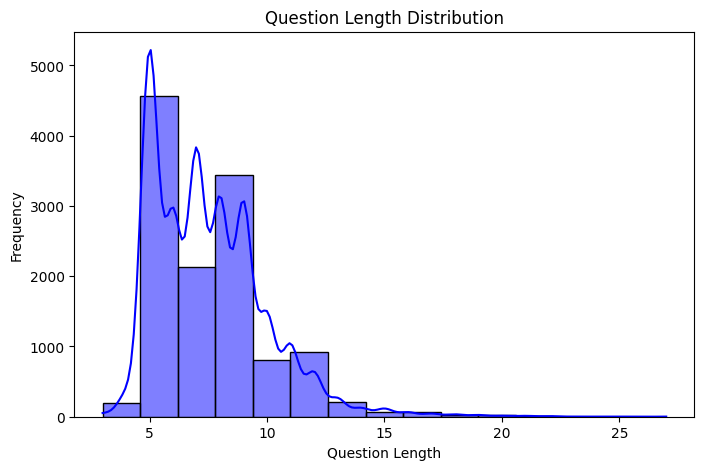

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
df['question_length']=df['question'].apply(lambda x:len(x.split()))
plt.figure(figsize=(8, 5))
sns.histplot(df['question_length'], bins=15, kde=True, color='blue')
plt.title('Question Length Distribution')
plt.xlabel('Question Length')
plt.ylabel('Frequency')
plt.show()

2. Most Frequent Answers

<ipython-input-31-a6dbd98d4ca2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=answer_counts.values, y=answer_counts.index, palette='viridis')


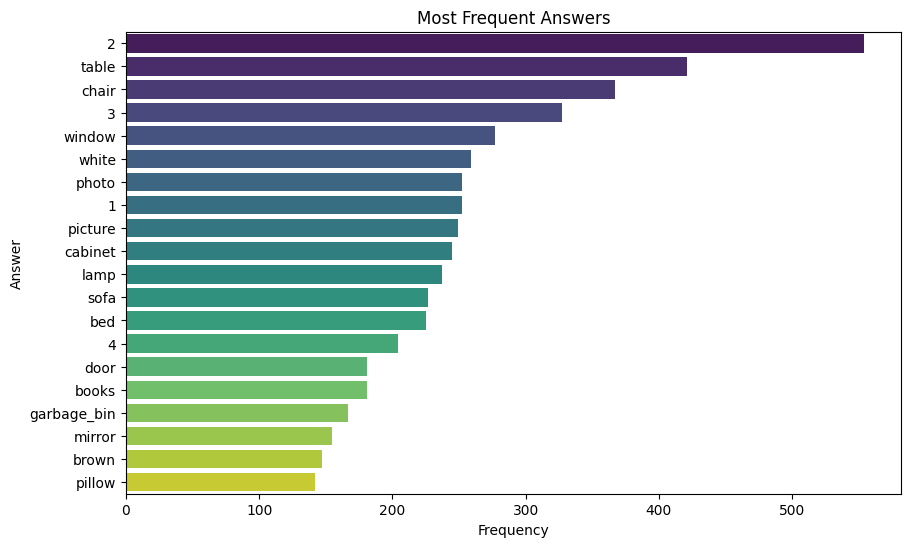

In [31]:
answer_counts = df['answer'].value_counts().nlargest(20)
plt.figure(figsize=(10,6))
sns.barplot(x=answer_counts.values, y=answer_counts.index, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Answer')
plt.title('Most Frequent Answers')
plt.show()

3. Question types (starting word)

<ipython-input-37-f6a0c1459d2a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=qt_counts.index, y=qt_counts.values, palette='pastel')


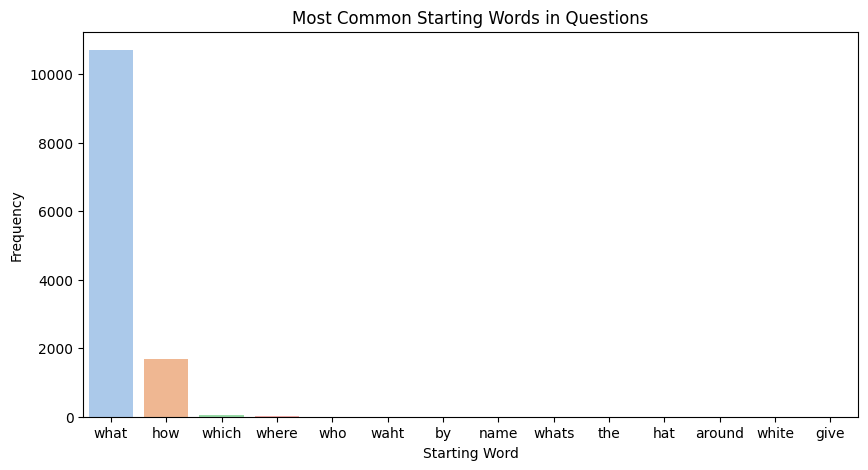

In [37]:
df['question_type'] = df['question'].apply(lambda x: x.lower().split()[0])
qt_counts = df['question_type'].value_counts().nlargest(20)
plt.figure(figsize=(10, 5))
sns.barplot(x=qt_counts.index, y=qt_counts.values, palette='pastel')
plt.title('Most Common Starting Words in Questions')
plt.xlabel('Starting Word')
plt.ylabel('Frequency')
plt.show()

4. Show some random image-question-answer triplet

In [38]:
import os
from PIL import Image
image_dir = '/content/archive/dataset/images'
samples = df.sample(4)
plt.figure(figsize=(12, 8))
for i, row in enumerate(samples.itertuples(), 1):
    img_path = os.path.join(image_dir, row.image_id)
    if os.path.exists(img_path):
        img = Image.open(img_path)
        plt.subplot(2, 2, i)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Q: {row.question}\nA: {row.answer}")
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

# **Image Feature Extraction using ResNet152**

In [ ]:
#import torch
#from torchvision.models import ResNet152_Weights
#import torchvision.transforms as transforms
#from PIL import Image
#import os
#import pandas as pd
#from tqdm import tqdm
# path to image folder
#image_folder = '/content/archive/dataset/images'
#output_feature_file = '/content/archive/dataset/resnet_features.pt'

# load pretrained resnet
#weights = ResNet152_Weights.DEFAULT
#resnet = weights.transforms()
#resnet = models.resnet152(pretrained=True)
#resnet = torch.nn.Sequential(*list(resnet.children())[:-1])
#resnet.eval()

# Image Transform for ResNet
#transform = transforms.Compose([transforms.Resize((224,224)),
 #                               transforms.ToTensor(),
  #                              transforms.Normalize(
   #                                 mean=[0.485, 0.456, 0.406],
    #                                std=[0.229,0.224,0.225])
     #                           ])
#transform = weights.transforms()


# Load ImageIDs from data.csv
#with open('/content/archive/dataset/data.csv', 'r') as f:
 # vqa_load = pd.read_csv(f)
  #image_ids = {os.path.splitext(image_id)[0] + ".png" for img_id in vqa_load['image_id']}

  # Feature Extraction
 # image_feature = {}
  #for image_id in tqdm(image_ids):
  #  image_path = os.path.join(image_folder, image_id)
   # if not os.path.exists(image_path):
    #  print(f"Missing: {image_path}")
     # continue
    #try:
     # image = Image.open(image_path).convert('RGB')
      #image_tensor = transform(image).unsqueeze(0)
      #with torch.no_grad():
       # features = resnet(image_tensor).squeeze().numpy()
      #image_feature[image_id] = features
    #except Exception as e:
     # print(f"Error on Image ID: {image_id}, {e}")

# Feature Extraction
#image_features = {}
#for filename in tqdm(os.listdir(image_folder)):
 #   if filename.endswith('.jpg') or filename.endswith('.png'):
  #      image_path = os.path.join(image_folder, filename)
   #     img = Image.open(image_path).convert('RGB')
    #    img_tensor = transform(img).unsqueeze(0)
     #   with torch.no_grad():
      #      features = resnet(img_tensor).squeeze().numpy()
       # image_features[filename] = features


# Save Features
##torch.save(image_features, output_feature_file)
#print(f"\n Image Features Saved to: {output_feature_file}")
##print(f"Total Image Processes: {len(image_features)}")
#print(image_features)

100%|██████████| 1449/1449 [00:31<00:00, 45.61it/s]


Streaming output truncated to the last 5000 lines.
          0.63918144,  0.60493195],
        [ 0.70768046,  0.72480524,  0.70768046, ...,  0.673431  ,
          0.6563062 ,  0.6220567 ],
        [ 0.74193   ,  0.74193   ,  0.70768046, ...,  0.673431  ,
          0.6563062 ,  0.63918144],
        ...,
        [-1.5870366 , -1.6212862 , -1.7582842 , ..., -0.7479236 ,
         -0.7307989 , -0.81642264],
        [-1.6897851 , -1.7411594 , -1.8096584 , ..., -0.78217316,
         -0.7307989 , -0.78217316],
        [-1.7411594 , -1.7925336 , -1.843908  , ..., -0.78217316,
         -0.7650484 , -0.78217316]],

       [[ 0.48529422,  0.50280124,  0.48529422, ...,  0.4677872 ,
          0.45028022,  0.41526622],
        [ 0.5203082 ,  0.5203082 ,  0.48529422, ...,  0.48529422,
          0.4677872 ,  0.45028022],
        [ 0.5378152 ,  0.5203082 ,  0.48529422, ...,  0.48529422,
          0.4677872 ,  0.4677872 ],
        ...,
        [-1.8956583 , -1.8256302 , -1.7906162 , ..., -0.880252  ,
   

In [36]:
# Image Feature Extraction using ResNet152
from torchvision import models, transforms
from PIL import Image
import os
import torch
import pandas as pd
from tqdm import tqdm
# Preparing Model
resnet = models.resnet152(weights=models.ResNet152_Weights.IMAGENET1K_V1)
resnet.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std = [0.229, 0.224, 0.225])
])

data = pd.read_csv('/content/archive/dataset/data.csv')
image_folder = '/content/archive/dataset/images'

# Appending Image Features
image_features = []
for image_id in tqdm(data['image_id']):
  image_path = os.path.join(image_folder, f"{image_id}.png")
  if not os.path.exists(image_path):
    continue
    image = Image.open(image_path).convert('RGB')
    img_tensor = transform(image).unsqueeze(0)
    with torch.no_grad():
      features = resnet(img_tensor)
    image_features.append(feature.squeeze())

# Save the Model
torch.save(image_features, '/content/archive/dataset/resnet_features.pt')
print("Image Features Saved")


Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:02<00:00, 90.2MB/s]
100%|██████████| 12468/12468 [00:00<00:00, 230487.35it/s]

Image Features Saved


In [ ]:
#valid_image_ids = [image_id for img_id in image_ids if os.path.exists(os.path.join('/content/archive/dataset/images', image_id))]
#print(f"Total images found on disk: {len(valid_image_ids)}")


In [ ]:
#print(vqa_load['image_id'].head())

In [ ]:
#print(os.listdir('/content/archive/dataset/images')[:10])


In [ ]:
#all_files = set(os.listdir('/content/archive/dataset/images'))
#valid_image_ids = image_ids.intersection(all_files)
#print(f"Valid images found: {len(valid_image_ids)}")


# **Question Encoding using BERT**

In [39]:
import torch
from transformers import BertModel, BertTokenizer
from tqdm import tqdm
import pandas as pd

# Load Pre-trained BERT model & tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')
bert_model.eval()

#GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
bert_model.to(device)

# Filtered DataFrame
df = pd.read_csv('/content/archive/dataset/data.csv')
questions = df['question'].tolist()

# Question Embeddings
question_embedding = []

with torch.no_grad():
    for question in tqdm(questions):
      inputs = tokenizer(question, return_tensors='pt', padding=True, truncation=True, max_length=32)
      inputs = {k: v.to(device) for k, v in inputs.items()}

      outputs = bert_model(**inputs)
      cls_embedding = outputs.last_hidden_state[:,0,:]
      question_embedding.append(cls_embedding.cpu())

# Stack all Question vectors into tensor
question_tensor = torch.stack(question_embedding)

# Save
torch.save(question_tensor, '/content/archive/dataset/bert_question_embedding.pt')
print("BERT Question Embedding Saved")
print(f"Shape: {question_tensor.shape}")
print("Embedding:", question_tensor)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 12468/12468 [21:35<00:00,  9.63it/s]


BERT Question Embedding Saved
Shape: torch.Size([12468, 1, 768])
Embedding: tensor([[[-0.8029,  0.0548, -0.1633,  ..., -0.3796,  0.5903,  0.1580]],

        [[-1.0474,  0.1142, -0.2015,  ..., -0.2688,  0.5488, -0.0044]],

        [[-0.2224,  0.4164, -0.1561,  ..., -0.2663,  0.3920,  0.0498]],

        ...,

        [[-0.2848,  0.2351, -0.1821,  ..., -0.6429,  0.1976, -0.0410]],

        [[-0.2820,  0.1726, -0.0547,  ..., -0.1507,  0.2078,  0.1203]],

        [[-0.2954,  0.3874, -0.1249,  ..., -0.2896,  0.1508,  0.1521]]])


In [ ]:
#from transformers import BertTokenizer, BertModel
#import torch

#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#model = BertModel.from_pretrained('bert-base-uncased')
#model.eval()

#question_embeddings = []
#for question in tqdm(data['question']):
#    inputs = tokenizer(question, return_tensors='pt', truncation=True, padding=True)
#    with torch.no_grad():
#        outputs = model(**inputs)
#        embedding = outputs.last_hidden_state.mean(dim=1)
#    question_embeddings.append(embedding.squeeze())

#torch.save(question_embeddings, '/content/archive/dataset/bert_question_embedding.pt')
#print(f"Question Embeddings Saved")

# **Dataset + Model**

In [41]:
# Dataset
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd

class VQADataset(Dataset):
  def __init__(self, dataframe, image_features_path, question_embeddings_path):
      self.df = dataframe.reset_index(drop=True)
      self.image_features = torch.load(image_features_path, map_location='cpu')
      self.question_embeddings = torch.load(question_embeddings_path, map_location='cpu')

      # Build Answer Vocabulary
      self.answers = self.df['answer'].tolist()
      self.answer_vocab = {ans : idx for ans, idx in enumerate(sorted(set(self.answers)))}
      self.idx2ans = {idx : ans for ans, idx in self.answer_vocab.items()}

  def __len__(self):
    return len(self.df)

  def __getitem__(self, idx):
    img_features = self.image_features[idx]
    question_embeddings = self.question_embeddings[idx]
    labels = self.answer_vocab[self.df.loc[idx, 'answer']]
    return img_features, question_embeddings, labels

# Initialize Dataset
dataframe = pd.read_csv('/content/archive/dataset/data.csv')
# Feature Path
image_features_path = '/content/archive/dataset/resnet_features.pt'
question_embeddings_path = '/content/archive/dataset/bert_question_embedding.pt'
# Create Dataset
dataset = VQADataset(dataframe, image_features_path, question_embeddings_path)
print("Dataset Initialized")
#sample = dataset[0]
#print("Image Feature Shape:", sample[0].shape)
#print("Question Embedding Shape:", sample[1].shape)
#print("Label Index:", sample[2])

Dataset Initialized


In [42]:
# VQA Model   Combining Features of Image + Question -> FC layer -> Softmax Classifier
import torch.nn as nn
import torch.nn.functional as F

class VQAModel(nn.Module):
  def __init__(self, num_classes):
    super(VQAModel, self).__init__()
    self.fc1 = nn.Linear(2048 + 768, 512)   # First Fully Connected Layer
    self.dropout = nn.Dropout(0.3)          # Dropout for Regularization
    self.fc2 = nn.Linear(512, num_classes)  # Second Fully Connected Layer

  def forward(self, img_features, question_embeddings):
    x = torch.cat([img_features, question_embeddings], dim=1)
    x = F.relu(self.fc1(x))                 # Applying relu on fc1
    x = self.dropout(x)                     # Applying Dropout on x
    x = self.fc2(x)
    return x
    print(f"Model Output:", x)

print("VQAModel Combined Features")

VQAModel Combined Features


# **Training Loop for VQA**

In [43]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm

# Spliting Dataset into 80% train & 20% val
train_size = int(0.8 * len(dataframe))
val_size = len(dataframe) - train_size
train_dataset, val_dataset = random_split(dataframe, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
print(f"Train Dataset Size: {len(train_dataset)}")
print(f"Validation Dataset Size: {len(val_dataset)}")

Train Dataset Size: 9974
Validation Dataset Size: 2494


In [44]:
# Initialize Model, Loss, Optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_classes = len(dataframe['answer'].unique())  # len(dataframe.answer_vocab)                                     #len(dataframe['answer'].unique())
model = VQAModel(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
print("Model Initialized")

Model Initialized


In [47]:
# Training Function
def train(model, train_loader, criterion, optimizer):
  model.train()
  total_loss = 0

  for img_features, question_embeddings, labels in tqdm(train_loader):
    img_features = img_features.to(device)
    question_embeddings = question_embeddings.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    outputs = model(img_features, question_embeddings)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  return total_loss / len(train_loader)
  print(f"Training Loss: {total_loss / len(train_loader)}")

In [48]:
# Validation Function
def evaluate(model, val_loader, criterion):
  model.eval()
  total_loss = 0
  correct = 0
  total = 0

  with torch.no_grad():
    for img_features, question_embeddings, labels in tqdm(val_loader):
      img_features = img_features.to(device)
      question_embeddings = question_embeddings.to(device)
      labels = labels.to(device)

      outputs = model(img_features, question_embeddings)
      loss = criterion(outputs, labels)
      total_loss += loss.item()

      i, predicted = torch.max(outputs.data, 1)
      correct += (predicted == labels).sum().item()
      total += labels.size(0)

    accuracy = correct / total
    return total_loss / len(val_loader), accuracy
    print(f"Validation Loss: {total_loss / len(val_loader)}, Validation Accuracy: {accuracy}")

In [49]:
# Run Training Loop
epochs = 10
for i in range(epochs):
  train_loss = train(model, train_loader, criterion, optimizer)
  val_loss, val_accuracy = evaluate(model, val_loader, criterion)
  print(f"Epoch: {i+1}/{epochs}")
  print(f"Train Loss: {train_loss:.4f}")
  print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

  0%|          | 0/312 [00:00<?, ?it/s]


KeyError: 3609

In [56]:
import torch

try:
    data = torch.load('/content/archive/dataset/resnet_features.pt', map_location='cpu')
    print(f"Type: {type(data)}")
    if isinstance(data, list):
        print(f"First item type: {type(data[0])}")
        print(f"Feature shape: {data[0].shape}")
except Exception as e:
    print("Error:", e)


Type: <class 'list'>
Error: list index out of range
